<a href="https://colab.research.google.com/github/lfernandezs/WordEmbeddingsTango/blob/main/TP_Final_Labo_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [ ]:
!pip install tqdm
!pip install stanza
!pip install sentileak
!pip install sentiment_analysis_spanish

In [ ]:
import pandas             as pd
import numpy              as np
import matplotlib.pyplot  as plt
import seaborn            as sns

from sklearn.decomposition  import PCA
from sklearn.manifold       import TSNE
from google.colab           import drive
from tqdm.auto              import tqdm

# Limpieza de datos
import re
import string

# Librerías Natural Languaje ToolKit
import nltk
import stanza

nltk.download('stopwords')
stanza.download('es')

# Gensim
from gensim.models.phrases  import Phrases, Phraser
from gensim.corpora import Dictionary
from gensim.utils           import tokenize
from gensim.matutils        import corpus2csc
from gensim.models          import TfidfModel

# Sentiment Analysis
from sentileak import dataloader
from sentileak import SentiLeak

from sentiment_analysis_spanish import sentiment_analysis

# WordCloud
from wordcloud import WordCloud

# Word2Vec
import multiprocessing
from gensim.models import Word2Vec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2021-07-04 16:01:20 INFO: Downloading default packages for language: es (Spanish)...


2021-07-04 16:03:14 INFO: Finished downloading models and saved to /root/stanza_resources.


# Funciones Auxiliares

## Limpieza de datos

In [ ]:
def clean_text_1(text):
  # Minúscula
  text = text.lower()
  # Reemplaza signos de puntuación
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  # Remueve palabras que contienen números
  text = re.sub('\w*\d\w*', '', text)
  # Remueve símbolos raros
  simbolos = ["(", ")", "'", "¿", '...', '_', '-', '—', '¡', '"', '`']
  for s in simbolos:
    text = text.replace(s, ' ')
  # Remueve newlines
  text = re.sub('\n', ' ', text)
  # Remueve espacios duplicados
  text = re.sub(' +', ' ', text)
  return text

def clean_text_2(text):
  # Extrae palabras que no son palabras
  extraer = 'aaah|ee|bom|ir|turutu|ro|maluma|feid|yeahyeah|ho|hennessy|lyanno|muah|brrra|be|aahh|aai\
  |ahah|ahahah|ei|mbre|uuuu|yeah|yeh|yo|ir|ey|eh|pa|si|to|má|ere|s|rar|ara|pe|sa|daddy|yankee|'
  clean_artists_names = ['ooh', 'ay', 'hello', 'uoh', 'll', 'tion', 'ay', 'you', 'on', 'uh', 'ovy', 'oh', 'i', 'pum', 'dale', 'tra', 'ma', 'in', 'ah', 'eh', 'po', 'the', 'Bad Bunny', 'KAROL G', 'J Balvin', 'Daddy Yankee', 'Maluma', 'Anuel AA', 'Ozuna', 'Myke Towers', 'Farruko', 'Sech', 'Camilo', 'Don Omar', 'Natti Natasha', 'Nicky Jam', 'Nio García', 'Arcangel', 'Los Legendarios', 'Mau y Ricky', 'Jay Wheeler', 'CNCO', 'Fuego', 'Lunay', 'Wisin & Yandel', 'Cauty', 'Manuel Turizo', 'Wisin', 'Dalex', 'Vico C', 'Lil Silvio & El Vega', 'C. Tangana', 'Kevin Roldán', 'Tego Calderón', 'Nigga (Flex)', 'Feid', 'El Alfa (El Jefe)', 'R.K.M & Ken Y', 'Chino & Nacho', 'Yandel', 'Bryant Myers', 'Jerry Di', 'Zion & Lennox', 'FMK', 'La Factoria', 'Tito El Bambino', 'Hector El Father', 'Gente de Zona', 'Lyanno', 'J Alvarez', 'Brytiago', 'Boza', 'Nacho', 'Jowell & Randy', 'Bad Gyal', 'Tony Dize', 'Noriel', 'Paloma Mami', 'Joey Montana', 'Ryan Castro', 'RVFV', 'Galvan Real', 'Mariah Angeliq', 'Trebol Clan', 'Justin Quiles', 'Andy Rivera', 'JD Pantoja', 'El Dragon', 'Lenny Tavárez', 'Farina', 'Mora', 'Divino', 'Zion', 'Alexis y Fido', 'Salserin', 'Don Patricio', 'Pitizion', 'Latin Dreams', 'Makano', 'Big Apple (Manzana)', 'Amenazzy', 'Javiielo', 'Jencarlos Canela', 'Christian Daniel', 'Ivy Queen', 'DJ Tao', 'Lucenzo', 'Naim Darrechi', 'Lalo Ebratt', 'Baby Rasta & Gringo', 'Guaynaa', 'Shamanes', 'Yomo', 'Tempo', 'Danny Romero', 'La Base', 'Casper Magico', 'El Simbolo', 'Los Van Van', 'Juhn', 'Valentino (PR)', 'Reykon', 'Magnate y Valentino', 'Lenier', 'Khriz y Angel', 'Omar Montes', 'Dragón y Caballero', 'Yaga Y Mackie', 'Super Yei', 'Eddy Lover', 'Emilia', 'Rich Music LTD', 'VF7', 'Daviles de Novelda', 'Jacob Forever', 'Arcangel Y de La Ghetto', 'Yera', 'Perro Primo', 'Eddie Dee', 'Chencho Corleone', 'Xtreme', 'Harold Velazquez', 'Calle Ciega', 'Bandido', 'Randy De La Ghetto', 'KEVVO', 'Dyland & Lenny', 'Lérica', 'Yelsid', 'Pepe Quintana', 'DJ Mendez', 'Secreto (El Famoso Biberón)', 'RHINO', 'Bruno LC', 'Omar Geles', 'Los Rumberos', 'Sael', 'Ceky Viciny', 'Franco El Gorila', 'Luisa W', 'JOTAPE', 'Lito Y Polaco', 'Golpe a Golpe', 'Kevin Lyttle', 'Baby Ranks', 'Julio Voltio', 'Lorena Santos (ES)', 'El Mayor Clásico', 'Dylan Fuentes', 'Michell Acevedo', 'Gigolo Y La Exce', 'Noreh', 'Jiggy Drama', 'Andy Aguilera', 'XRIZ', 'Luny Tunes', 'Decai', '12 Discipulos', 'Agus Padilla', 'Big Yamo', 'Yaviah', 'Erre XI', 'Jay Menez', 'Mafu Crew', 'Mavado', 'Lorna', 'Mario Bautista', 'Ian Lucas', 'Leslie Shaw', 'Candyman', 'Los Benjamins', 'Nfasis', 'Cheka', 'Alex Gargolas', 'Miguelito', 'Don Miguelo', 'Don Chezina', 'El Monje', 'Brunenger', 'Ms Nina', 'Nakary', 'Princess Lover', 'LeeBrian', 'Two Flow', 'Freddy Sky', 'La Perversa', 'Michael Stuart', 'Tres Dedos', 'Los Cantores de Chipuco', 'ALAN GOMEZ', 'MJ', 'Nobeat', 'Cruzito', 'Maffio', 'Yerba Buena', 'Juanka El Problematik', 'Sailorfag', 'Parner', 'Randy', 'Notch', 'Blindaje 10', 'Luam', 'Mati Gómez', 'La Factoria Del Sabor', 'Kiko El Crazy', 'Rafa Pabön', 'Bachatas y Ballenatos', 'Jayko', 'Magnate', 'Yessia', 'Jimmy Bad Boy', 'Victor Perez', "Keen'v", 'Gonzalo Nawel', 'Nibal', 'Nina Sky', 'Izaak', 'El Médico', 'Tony Tun Tun', 'Opalo', 'Ghetto Kids', 'Pacho El Antifeka', 'Morelli', 'Tainy', 'Wibal y Alex', 'Saraí (ES)', 'Ramón Vega', 'La Fábula', 'Los De Abajo', 'Mambo DJ', 'Million Stylez', 'RK', 'Don Kikas', 'Revol', 'Reggaeton Niños', 'T (Tasha)', 'Bandaga', 'Robledo', 'Reggaeton Boys', 'Alexis & Fido', 'Kim Flores', 'Konde', 'Latino Way', 'Juakin Saenz', 'Chapa C', 'Senhores Cafetões', 'BRUNO CABRERA DJ', 'Chelsy Shantel', 'Agrupacion 52', 'Elver Sanchez', 'Carlos Arroyo', 'Eliel', 'Santa Fé', 'C Note', 'Admiral T', 'María Escarmiento', 'Fernanda MX', 'Pinto Wahin', 'Bellakath', 'Marconi Impara', 'Haze (House of Haze)', 'Rey Pirin', 'Izzy La Reina', 'Alef Augusto', 'Gallego', 'Velocity Girl', 'Conttato', 'Yari M', 'Los Tigrillos', 'Valentina Storino', 'Cris Avelin', 'Muamba Bitt', 'Nandah', 'Joako Fábrega', 'Grupo Furacão', 'YEGOR GOMEZ', 'Lawrence Matthews', 'Darlene', 'Shaka Y Dres', 'Abdiel', 'Ikis Oficial', 'Brilho do Samba Rock', 'Eve Blood', 'VetaVeta', 'Ali Angel', 'Mc Bonekinho', '7 House', 'Black Mosquito', 'Obsession', 'El Coyote The Show', 'Levante Nacional', 'Amazon', 'Zion Travelers', 'Kris Floyd', 'Jzabehl', 'Yessie', 'Shakundun', 'Thierry Cham']
  extraer += "|".join(clean_artists_names)
  regex   = re.compile(r'\b('+extraer+r')\b', flags=re.IGNORECASE)
  text    = regex.sub("", text)
  return text

## Remover stopwords y lemmaatizar

In [ ]:
def inicializar_stanza():
  nlp = stanza.Pipeline(lang='es', processors='tokenize,mwt,pos,lemma')
  sw = nltk.corpus.stopwords.words('spanish')
  return (nlp, sw)

def remove_sw(text, nlp, sw):
  words = text.split(' ')
  words_clean = []
  for w in words:
    if w:
      if w == 'él' or w == 'ella':
        words_clean.append(w)
      elif w not in sw:
        words_clean.append(nlp(w).sentences[0].words[0].lemma)
  return ' '.join(words_clean)

  def remove_sw_2(text, nlp, sw):
  words       = text.split(' ')
  words_clean = []
  
  for w in words:
    if w not in sw:
        words_clean.append(w)

  return ' '.join(words_clean)

## Bigramas

In [ ]:
def bigrams(data):
  input = [row.split() for row in data['lyric']]
  phrases = Phrases(input, min_count=30, progress_per=1000) 
  bigram = Phraser(phrases)
  sentences = bigram[input]

  return sentences

# Funciones Principales

## Entrenar Word2Vec
**`df`** es un Dataframe que contiene una columna **`lyric`**. Se entrena el Word2Vec de esos lyrics.  
Devuelve el `w2v_model`.

In [ ]:
def entrenar_w2v(df):
  tqdm.pandas()
  data_clean = pd.DataFrame(df.lyric.progress_apply(lambda x: clean_text_1(x)))
  data_clean = pd.DataFrame(data_clean.lyric.progress_apply(lambda x: clean_text_2(x)))
  data_clean = pd.DataFrame(data_clean.lyric.progress_apply(lambda x: remove_sw(x, nlp, sw)))
  sentences = bigrams(data_clean)
  if not sentences: return None
  cores = multiprocessing.cpu_count()

  w2v_model = Word2Vec(min_count=5,
                      window=4,
                      size=300,
                      sample=6e-5,
                      alpha=0.03,
                      min_alpha=0.0007,
                      negative=20,
                      workers=cores)
  w2v_model.build_vocab(sentences)
  w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
  w2v_model.init_sims(replace=True)
  return w2v_model

## Scatterplot de palabras más cercanas

In [ ]:
def tsnescatterplot(model, word, list_names, topn):

    sns.set_style("darkgrid")
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    close_words = model.wv.most_similar([word], topn=topn)
    
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)

    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    reduc = PCA(n_components=10).fit_transform(arrays)
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})

    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )

    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE de {}'.format(word.title()))

## Entrenar w2v feliz y triste
Dado un **`df`** con los lyrics de las canciones (columna **`lyric`**), devuelve dos `w2v_model`, uno entrenado con las canciones más alegres y otro con las más tristes.

In [ ]:
def w2v_por_sentimiento(df, median):
  sentimental = sentiment_analysis.SentimentAnalysisSpanish()
  df['Sentimiento'] = df['lyric'].apply(lambda x: np.mean([sentimental.sentiment(f) for f in x.split('.')]))
  if not median: median = df['Sentimiento'].median()
  cancion_feliz = df.loc[df['Sentimiento'] > median]
  cancion_triste = df.loc[df['Sentimiento'] <= median]
  w2v_model_feliz = entrenar_w2v(cancion_feliz)
  w2v_model_triste = entrenar_w2v(cancion_triste)
  return w2v_model_feliz, w2v_model_triste

## Entrenar w2v por época
Dado un **`df`** con una columna **`lyric`** y una columna **`year`**, devuelve una lista de modelos w2v, entrenados con lyrics de cada k años.  
Esto a veces me tira error cuando hay poca información en cada intervalo.

In [ ]:
def w2v_por_epoca(df, k):
  desde = df['year'].min()
  hasta = df['year'].max()
  modelos = []
  for i in range(desde, hasta, k):
    print(f'Año: {i}')
    df_aux = df.loc[(df['year'] >= desde) & (df['year'] < desde + k)]
    w2v_model = entrenar_w2v(df_aux)
    if not w2v_model: continue
    modelos.append(w2v_model)
  return modelos

## Entrenar w2v por artista
Dado un **`df`** con una columna **`lyric`** y una columna **`artist`**, devuelve una lista de modelos w2v, entrenados con lyrics de ese artista.

In [ ]:
def w2v_por_artista(df, artista):
  df_artista = df.loc[df['artista'] == artista]
  w2v_model = entrenar_w2v(df_artista)
  return w2v_model

## WordClouds

In [ ]:
def wordcloud(frequencies, dict_atr):
  wc = WordCloud(**dict_atr).generate_from_frequencies(frequencies)
  return wc

--------------------------------------------

# Ejecución

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/tangos.csv'
df = pd.read_csv(filename).dropna(subset=['lyric'])
df = df.drop(df.columns[[0, 5, 6]], axis=1) # Lo último es para borrar unas columnas extras que me aparecían

w2v con todas las canciones

In [ ]:
w2v_model = entrenar_w2v(df)

In [ ]:
w2v_model.save('tangos_2.w2v')

w2v dividido entre las felices y las tristes

In [ ]:
w2v_feliz, w2v_triste = w2v_por_sentimiento(df, 0.4)

In [ ]:
w2v_feliz.save('tangos_feliz_2.w2v')
w2v_triste.save('tangos_triste_2.w2v')

# Análisis del tango

In [ ]:
w2v_model = Word2Vec.load('tangos_2.w2v')

## Diferencias de géneros

In [ ]:
w2v_model.wv.most_similar(positive='mujer', topn=11)

[('leal', 0.9549416899681091),
 ('ofrecer', 0.9506291151046753),
 ('compañera', 0.9502280950546265),
 ('sincero', 0.9476680755615234),
 ('gozar', 0.9474782943725586),
 ('distar', 0.9473724365234375),
 ('vicio', 0.9447598457336426),
 ('pues', 0.9441124200820923),
 ('santo', 0.9383970499038696),
 ('grande', 0.9377262592315674),
 ('joven', 0.9369271993637085)]

In [ ]:
w2v_model.wv.most_similar(positive='hombre', topn =11)

[('malo', 0.9859627485275269),
 ('vergüenza', 0.9817746877670288),
 ('juez', 0.9728562831878662),
 ('consejo', 0.9727229475975037),
 ('quisistar', 0.9725596904754639),
 ('viejito', 0.9689061045646667),
 ('traicionar', 0.9684799909591675),
 ('aconsejar', 0.9671355485916138),
 ('ruin', 0.9662542343139648),
 ('derecho', 0.9655261635780334),
 ('demás', 0.9648571610450745)]

In [ ]:
w2v_model.wv.most_similar(positive='ella', topn=11)

[('abandonar', 0.9799908399581909),
 ('apenar', 0.9772439002990723),
 ('verdadero', 0.9770852327346802),
 ('rogar', 0.9748802781105042),
 ('ingrato', 0.97437983751297),
 ('sincero', 0.9738016128540039),
 ('aliviar', 0.9730413556098938),
 ('solamente', 0.9718337059020996),
 ('bes', 0.971264123916626),
 ('único', 0.9707845449447632),
 ('perjurar', 0.970562756061554)]

In [ ]:
w2v_model.wv.most_similar(positive='él', topn=11)

[('lección', 0.9828444719314575),
 ('resolver', 0.9826415777206421),
 ('ofender', 0.9821208715438843),
 ('decilar', 0.9788050055503845),
 ('pedido', 0.9776006937026978),
 ('enemigo', 0.9771934747695923),
 ('engañás', 0.9760633707046509),
 ('valorar', 0.9760199785232544),
 ('acostumbrar', 0.9759191870689392),
 ('entregado', 0.9757932424545288),
 ('apreciar', 0.9753429889678955)]

## Diferencias de género en canciones felices y tristes

Las canciones de tango no son muy felices... pongo el límite en 0.4.

In [ ]:
w2v_feliz = Word2Vec.load('tangos_feliz_2.w2v')
w2v_triste = Word2Vec.load('tangos_triste_2.w2v')

In [ ]:
w2v_feliz.wv.most_similar(positive='mujer', topn=11)

[('alma', 0.9999537467956543),
 ('mirar', 0.9999525547027588),
 ('volver', 0.9999523162841797),
 ('blanco', 0.9999517202377319),
 ('cálido', 0.9999517202377319),
 ('amar', 0.9999517202377319),
 ('lugar', 0.9999514818191528),
 ('pena', 0.9999513030052185),
 ('canción', 0.9999510049819946),
 ('amargura', 0.9999508857727051),
 ('gol', 0.9999507665634155)]

In [ ]:
w2v_feliz.wv.most_similar(positive='hombre')

[('ciudad', 0.9999589920043945),
 ('venir', 0.9999589920043945),
 ('pena', 0.999957799911499),
 ('muchacho', 0.9999568462371826),
 ('mirar', 0.999956488609314),
 ('sueño', 0.9999545812606812),
 ('tren', 0.999954342842102),
 ('rodar', 0.9999540448188782),
 ('tango', 0.9999536275863647),
 ('decir', 0.9999533295631409)]

In [ ]:
w2v_feliz.wv.most_similar(positive='ella', topn=11)

[('muchacho', 0.9999528527259827),
 ('pena', 0.9999520778656006),
 ('barro', 0.9999498128890991),
 ('sueño', 0.9999498128890991),
 ('oscuro', 0.9999496936798096),
 ('paisaje', 0.99994957447052),
 ('llamar', 0.9999493956565857),
 ('moza', 0.9999490976333618),
 ('ciudad', 0.9999489188194275),
 ('pasión', 0.9999484419822693),
 ('hacer', 0.999948263168335)]

In [ ]:
w2v_feliz.wv.most_similar(positive='él', topn=11)

[('gardel', 0.9999415874481201),
 ('cara', 0.9999415874481201),
 ('ausencia', 0.9999414682388306),
 ('pena', 0.9999409317970276),
 ('ciudad', 0.9999406933784485),
 ('"', 0.9999403953552246),
 ('mientras', 0.9999403953552246),
 ('paisaje', 0.9999403357505798),
 ('año', 0.9999402165412903),
 ('volar', 0.9999397993087769),
 ('viejo', 0.9999394416809082)]

In [ ]:
w2v_triste.wv.most_similar(positive='mujer', topn=14)

[('sincero', 0.9714762568473816),
 ('gozar', 0.9714597463607788),
 ('pues', 0.9692984819412231),
 ('vicio', 0.9656469821929932),
 ('supir', 0.9654565453529358),
 ('leal', 0.9643659591674805),
 ('ella', 0.963696300983429),
 ('grande', 0.9623314142227173),
 ('distar', 0.9611366987228394),
 ('pobrecito', 0.9604313969612122),
 ('lealtad', 0.9590345025062561),
 ('despreciar', 0.9583998918533325),
 ('fortuna', 0.9578553438186646),
 ('acordar', 0.9542546272277832)]

In [ ]:
w2v_triste.wv.most_similar(positive='hombre')

[('malo', 0.9875000715255737),
 ('quisistar', 0.9856019020080566),
 ('vergüenza', 0.9813128113746643),
 ('demostrar', 0.9795352220535278),
 ('pagar', 0.9771183729171753),
 ('traicionar', 0.9754838943481445),
 ('haber', 0.974713146686554),
 ('deber', 0.9717484712600708),
 ('padre', 0.970291256904602),
 ('creer', 0.9683111310005188)]

In [ ]:
w2v_triste.wv.most_similar(positive='ella', topn=11)

[('sincero', 0.9875739812850952),
 ('apenar', 0.9802507162094116),
 ('abandonar', 0.9801893830299377),
 ('solamente', 0.9797952771186829),
 ('supir', 0.9777782559394836),
 ('prometer', 0.9767986536026001),
 ('entregar', 0.9765030145645142),
 ('despreciar', 0.9760233163833618),
 ('perjurar', 0.9758548140525818),
 ('verdadero', 0.9755028486251831),
 ('rogar', 0.9752110242843628)]

In [ ]:
w2v_triste.wv.most_similar(positive='él')

[('esposa', 0.9891752004623413),
 ('deuda', 0.9871690273284912),
 ('engañás', 0.9870821833610535),
 ('convenir', 0.9870611429214478),
 ('niño', 0.9858888387680054),
 ('resolver', 0.9856513142585754),
 ('trance', 0.984430193901062),
 ('andáte', 0.9834789037704468),
 ('dejalar', 0.9832870960235596),
 ('francamente', 0.9830737113952637)]

## Atorrante

¿Qué significa que un hombre sea 'atorrante'?

In [ ]:
w2v_model.wv.most_similar(positive=['atorrante', 'hombre'], topn=20)

[('prepotencia', 0.9889070987701416),
 ('dejatir', 0.9848529100418091),
 ('maña', 0.9842661619186401),
 ('feo', 0.9839216470718384),
 ('conformar', 0.9834628701210022),
 ('esquinazo', 0.982857882976532),
 ('cuestión', 0.9817150831222534),
 ('engrubir', 0.981433629989624),
 ('mantener', 0.9809415340423584),
 ('yuta', 0.9799107313156128),
 ('decidido', 0.9790225625038147),
 ('marido', 0.978821873664856),
 ('mishiadura', 0.9785956144332886),
 ('olvidés', 0.9785815477371216),
 ('dao', 0.9783047437667847),
 ('criticar', 0.9778379201889038),
 ('según', 0.9761931896209717),
 ('ventaja', 0.975517988204956),
 ('protestar', 0.9748931527137756),
 ('valés', 0.9747637510299683)]

¿Qué es a 'mujer' lo que 'atorrante' es a hombre?

In [ ]:
w2v_model.wv.most_similar(positive=['atorrante', 'mujer'], negative=['hombre'])

[('vestir', 0.9827488660812378),
 ('coqueta', 0.9781981706619263),
 ('derrochar', 0.9747908115386963),
 ('gracioso', 0.9716352224349976),
 ('cautivar', 0.9684998393058777),
 ('sala', 0.9683561325073242),
 ('nervioso', 0.9680449962615967),
 ('pizpireta', 0.9667020440101624),
 ('zapatito', 0.9666156768798828),
 ('mascotita', 0.9642159938812256)]

## Orillero

In [ ]:
w2v_model.wv.most_similar(positive=['orillero', 'hombre'], negative=['mujer'])

[('botón', 0.9392216205596924),
 ('copar', 0.9267889261245728),
 ('cuatro', 0.9234347343444824),
 ('punta', 0.9196673631668091),
 ('cuarenta', 0.9196090698242188),
 ('once', 0.9132838249206543),
 ('tallar', 0.9110404253005981),
 ('gordo', 0.9101743102073669),
 ('cacho', 0.9098158478736877),
 ('ligero', 0.9078772068023682)]

In [ ]:
w2v_model.wv.most_similar(positive=['orillero', 'mujer'], negative=['hombre'],)

[('poeta', 0.9610801935195923),
 ('pareja', 0.9592643976211548),
 ('suburbio', 0.9564211964607239),
 ('maleva', 0.9555255770683289),
 ('cedrón', 0.9536415338516235),
 ('gentil', 0.9528270959854126),
 ('musa', 0.9524315595626831),
 ('arrabalero', 0.951435923576355),
 ('milongón', 0.9508661031723022),
 ('enredar', 0.9496427178382874)]

## Pizpireta

In [ ]:
w2v_model.wv.most_similar(positive=['pizpireta', 'mujer'])

[('milonguitar', 0.9534140825271606),
 ('preferido', 0.9522072672843933),
 ('diosa', 0.9499063491821289),
 ('cautivar', 0.9337620139122009),
 ('mimado', 0.9327958822250366),
 ('franco', 0.932288646697998),
 ('delicia', 0.9280923008918762),
 ('mocedad', 0.9248697757720947),
 ('gracia', 0.9238624572753906),
 ('vulgar', 0.9227582216262817)]

In [ ]:
w2v_model.wv.most_similar(positive=['pizpireta', 'hombre'], negative=['mujer'], topn=20)

[('tapa', 0.9779503345489502),
 ('leche', 0.9749021530151367),
 ('pellejo', 0.9743479490280151),
 ('patear', 0.9717594385147095),
 ('rajir', 0.9712762236595154),
 ('manga', 0.9704407453536987),
 ('soñás', 0.9698190689086914),
 ('marcador', 0.9693377017974854),
 ('apuntar', 0.969240128993988),
 ('bancar', 0.9689458012580872),
 ('codo', 0.9688173532485962),
 ('bicicleta', 0.9684320688247681),
 ('pelea', 0.9678846597671509),
 ('palmera', 0.9668692350387573),
 ('horno', 0.9668567180633545),
 ('crisis', 0.96659255027771),
 ('redoblona', 0.9661311507225037),
 ('potrillo', 0.965938150882721),
 ('varios', 0.9658105969429016),
 ('tomalar', 0.9657784700393677)]

## Odiar y amar con pasión

In [ ]:
w2v_model.wv.most_similar(positive=['pasión'])

[('encanto', 0.9701238870620728),
 ('sublime', 0.9616708159446716),
 ('ventura', 0.9571325778961182),
 ('ardiente', 0.9546709060668945),
 ('amor', 0.9524416327476501),
 ('caricia', 0.9501039981842041),
 ('ilusión', 0.9419574737548828),
 ('fervor', 0.941545307636261),
 ('amado', 0.9403142929077148),
 ('profundo', 0.9386763572692871)]

In [ ]:
w2v_model.wv.most_similar(positive=['amor'])

[('sublime', 0.9768869876861572),
 ('amar', 0.9764151573181152),
 ('caricia', 0.975938618183136),
 ('amoroso', 0.9751049280166626),
 ('dicho', 0.9707192182540894),
 ('ventura', 0.970492959022522),
 ('felicidad', 0.9688867330551147),
 ('amado', 0.9668660163879395),
 ('lograr', 0.9661361575126648),
 ('ilusión', 0.9601088762283325)]

In [ ]:
w2v_model.wv.most_similar(positive=['odio'])

[('duda', 0.9728277921676636),
 ('garra', 0.9718261957168579),
 ('cadena', 0.9685289859771729),
 ('maldito', 0.9680067896842957),
 ('matar', 0.9656062126159668),
 ('soportar', 0.9648911952972412),
 ('torpe', 0.9623980522155762),
 ('falsedad', 0.9603505730628967),
 ('burlar', 0.9601176381111145),
 ('odiar', 0.9586312770843506)]

In [ ]:
w2v_model.wv.most_similar(positive=['pasión', 'odio'])

[('agravio', 0.9643965363502502),
 ('delirio', 0.9622361660003662),
 ('ciego', 0.9617323875427246),
 ('mentido', 0.9595792293548584),
 ('confiar', 0.95918869972229),
 ('destrozar', 0.9590399265289307),
 ('celo', 0.9550061225891113),
 ('pecho', 0.9536603689193726),
 ('capricho', 0.9522993564605713),
 ('enojo', 0.9515905380249023)]

In [ ]:
w2v_model.wv.most_similar(positive=['pasión', 'amor'])

[('sublime', 0.9810129404067993),
 ('ventura', 0.9754806756973267),
 ('caricia', 0.974679708480835),
 ('encanto', 0.9726191759109497),
 ('amoroso', 0.9655022621154785),
 ('amado', 0.9651343822479248),
 ('ilusión', 0.9625464677810669),
 ('fervor', 0.957927942276001),
 ('amante', 0.9536493420600891),
 ('ideal', 0.9526654481887817)]

## Palabras más usadas por Edmundo Rivero en sus canciones 

In [ ]:
edmundo_rivero = ['Amablemente', 'Atenti pebeta', 'Cuando me entrés a fallar']
df_ER = df.loc[np.isin(df['name'], edmundo_rivero)]

# Limpio las palabras raras y stopwords
nlp, sw = inicializar_stanza()
df_ER.lyric = pd.DataFrame(df_ER.lyric.apply(lambda x: clean_text_1(x)))
df_ER.lyric = pd.DataFrame(df_ER.lyric.apply(lambda x: clean_text_2(x)))
df_ER.lyric = pd.DataFrame(df_ER.lyric.apply(lambda x: remove_sw(x, nlp, sw)))

2021-07-04 18:28:44 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |

2021-07-04 18:28:44 INFO: Use device: cpu
2021-07-04 18:28:44 INFO: Loading: tokenize
2021-07-04 18:28:44 INFO: Loading: mwt
2021-07-04 18:28:44 INFO: Loading: pos
2021-07-04 18:28:44 INFO: Loading: lemma
2021-07-04 18:28:44 INFO: Done loading processors!
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df_ER

,name,year,artist,lyric
181,Amablemente,NaN,Edmundo Rivero,encontrar bulín brazo embargo canchero cabrear...
328,Atenti pebeta,1929.0,Celedonio Flores,vereda fichar bacanazo yo haceter chitrula des...
550,Cafetín de Buenos Aires,1948.0,Enrique Santos Discépolo,chiquilín mirar afuera cosa nunca alcanzar ñat...
567,Calle Cabildo,1943.0,Edmundo Rivero,tardecita verano suave palabra amor acongojado...
896,Cuando me entrés a fallar,NaN,Celedonio Flores,rodao bolita pebete arrabalero fulero cachuso ...
2930,Pucherito de gallina,NaN,Roberto Medina,veinte abril venir centro debut corriente maip...


### Analizando todas las canciones

(-0.5, 1199.5, 799.5, -0.5)

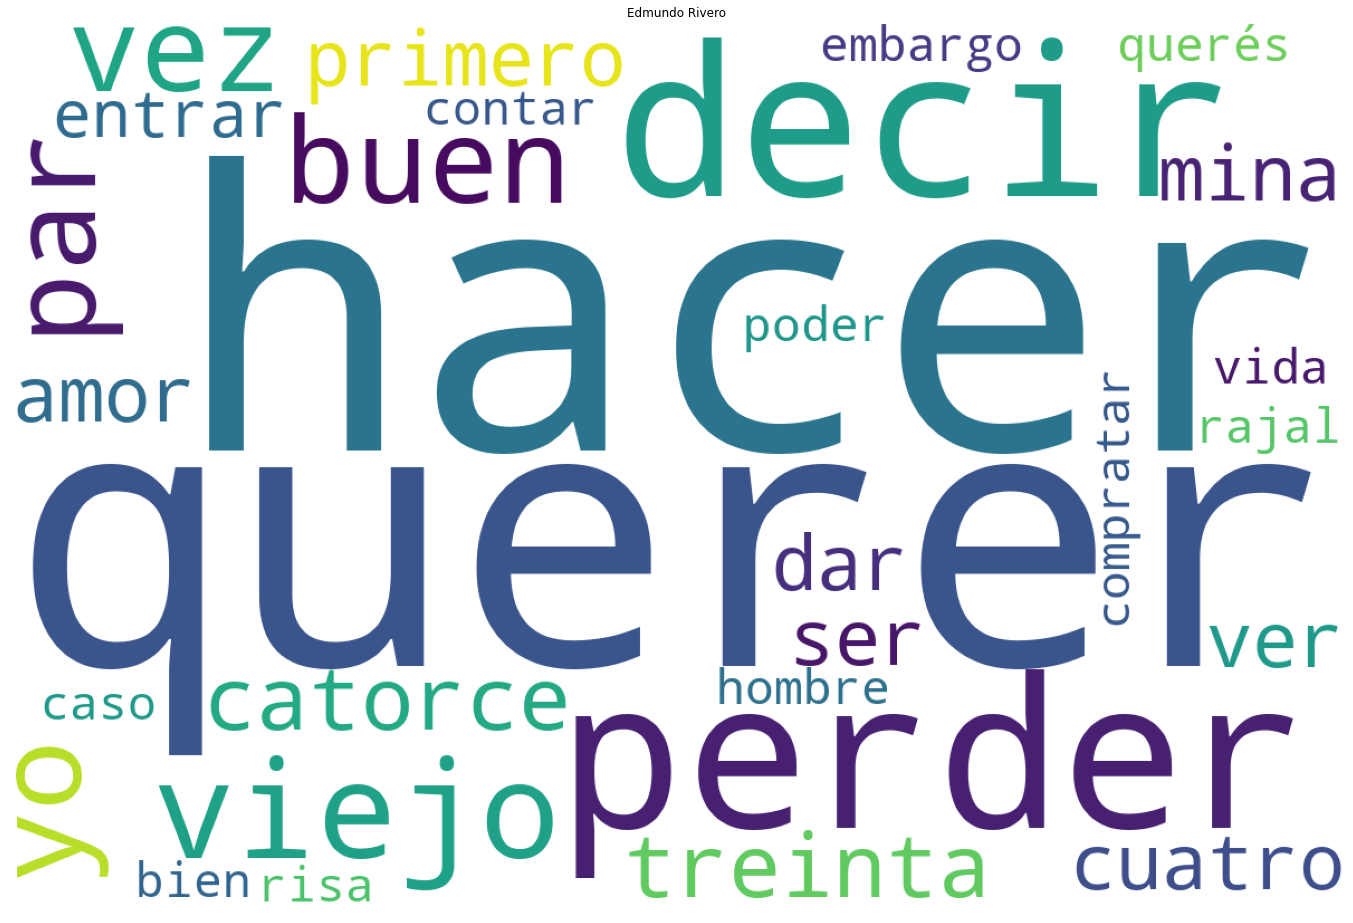

In [ ]:
frequencies = pd.Series(np.concatenate([x.split() for x in df_ER.lyric])).value_counts()

fig, axs = plt.subplots(figsize=(24, 20))
atrs = {'height':800,
        'width':1200,
        'background_color':'white',
        'max_words':30}

wc = wordcloud(frequencies, atrs)
axs.set_title("Edmundo Rivero")
axs.imshow(wc)
axs.axis('off')

### Analizando cada canción por separado

(-0.5, 1799.5, 1199.5, -0.5)

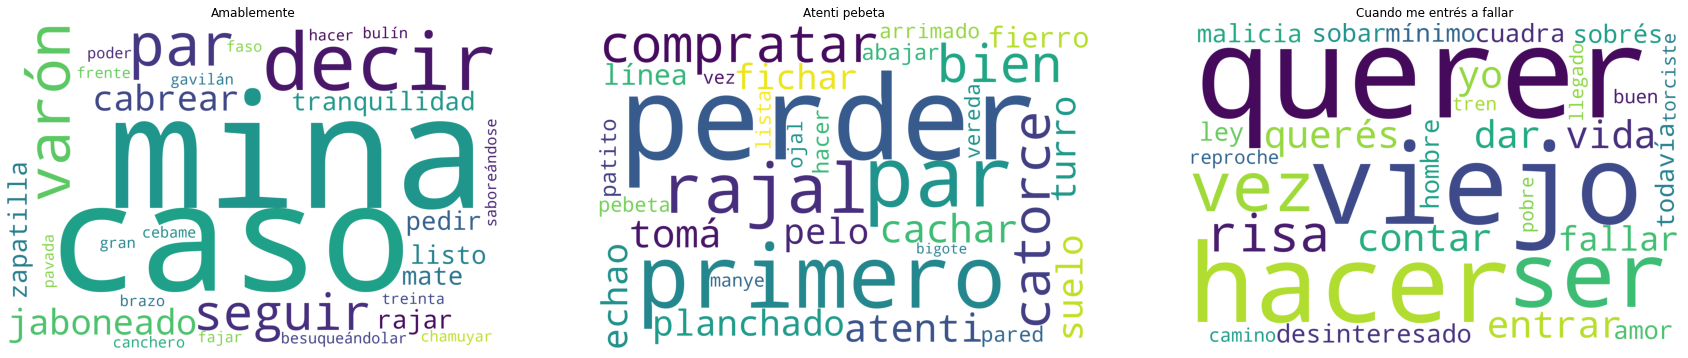

In [ ]:
frequencies = [pd.Series(df_ER.iloc[i,3].split()).value_counts().to_dict() for i in range(len(df_ER.index))]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 36))
atrs = {'height':1200,
        'width':1800,
        'background_color':'white',
        'max_words':30}

wc1 = wordcloud(frequencies[0], atrs)
axs[0].set_title(list(df_ER['name'])[0])
axs[0].imshow(wc1)
axs[0].axis('off')

wc2 = wordcloud(frequencies[1], atrs)
axs[1].set_title(list(df_ER['name'])[1])
axs[1].imshow(wc2)
axs[1].axis('off')

wc3 = wordcloud(frequencies[2], atrs)
axs[2].set_title(list(df_ER['name'])[2])
axs[2].imshow(wc3)
axs[2].axis('off')


## Palabras más usadas por Carlos Gardel en sus canciones 

In [ ]:
carlos_gardel = ['Por una cabeza', 'Mi Buenos Aires querido', 'Caminito']
df_CG = df.loc[np.isin(df['name'], carlos_gardel)]

# Limpio las palabras raras y stopwords
nlp, sw = inicializar_stanza()
df_CG.lyric = pd.DataFrame(df_CG.lyric.apply(lambda x: clean_text_1(x)))
df_CG.lyric = pd.DataFrame(df_CG.lyric.apply(lambda x: clean_text_2(x)))
df_CG.lyric = pd.DataFrame(df_CG.lyric.apply(lambda x: remove_sw(x, nlp, sw)))

2021-07-04 18:35:09 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |

2021-07-04 18:35:09 INFO: Use device: cpu
2021-07-04 18:35:09 INFO: Loading: tokenize
2021-07-04 18:35:09 INFO: Loading: mwt
2021-07-04 18:35:09 INFO: Loading: pos
2021-07-04 18:35:09 INFO: Loading: lemma
2021-07-04 18:35:09 INFO: Done loading processors!
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Analizando todas las canciones

(-0.5, 1199.5, 799.5, -0.5)

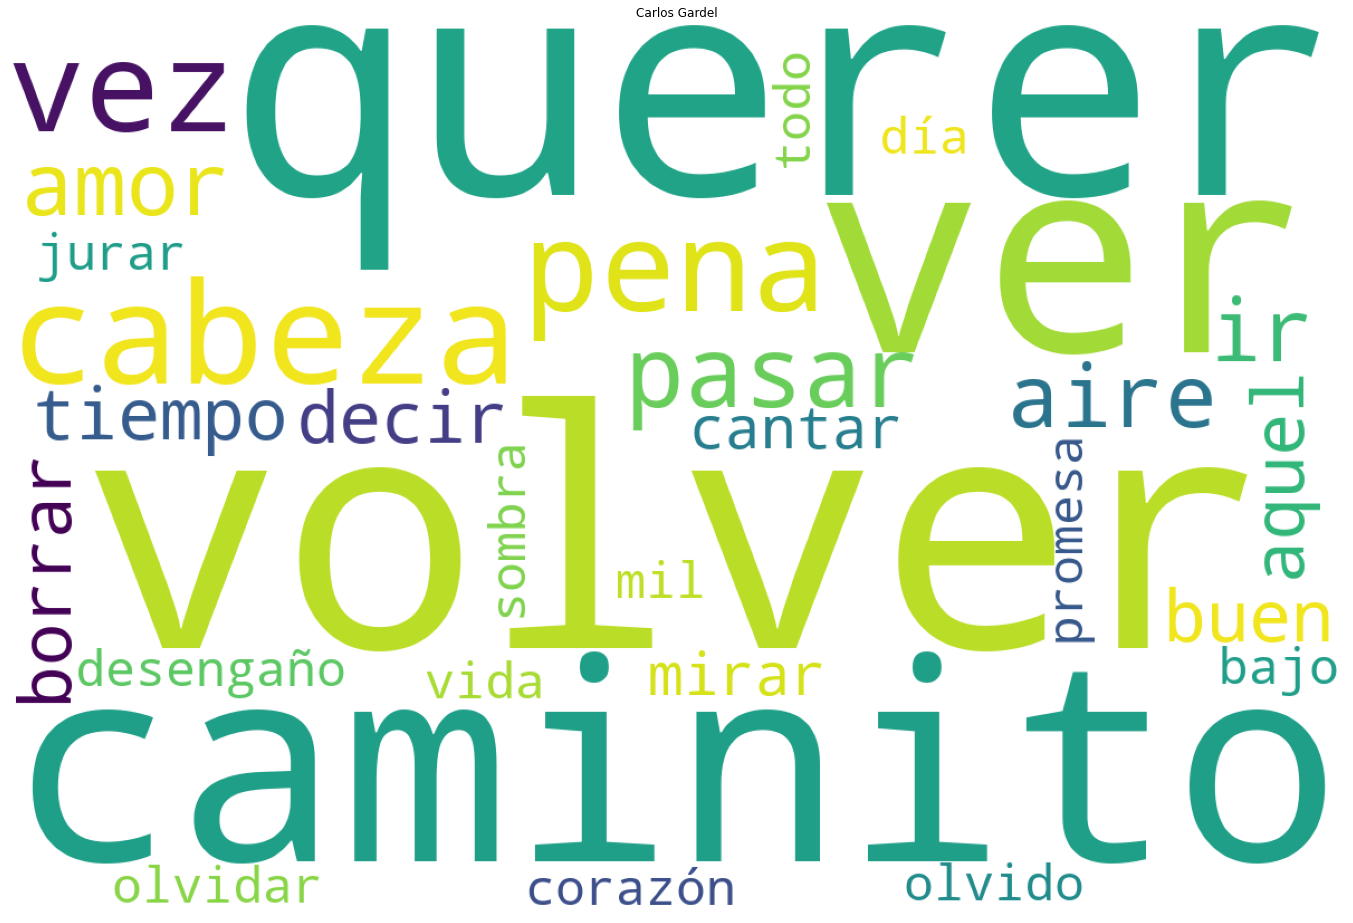

In [ ]:
frequencies = pd.Series(np.concatenate([x.split() for x in df_CG.lyric])).value_counts()

fig, axs = plt.subplots(figsize=(24, 20))
atrs = {'height':800,
        'width':1200,
        'background_color':'white',
        'max_words':30}

wc = wordcloud(frequencies, atrs)
axs.set_title("Carlos Gardel")
axs.imshow(wc)
axs.axis('off')

### Analizando cada canción por separado

(-0.5, 1799.5, 1199.5, -0.5)

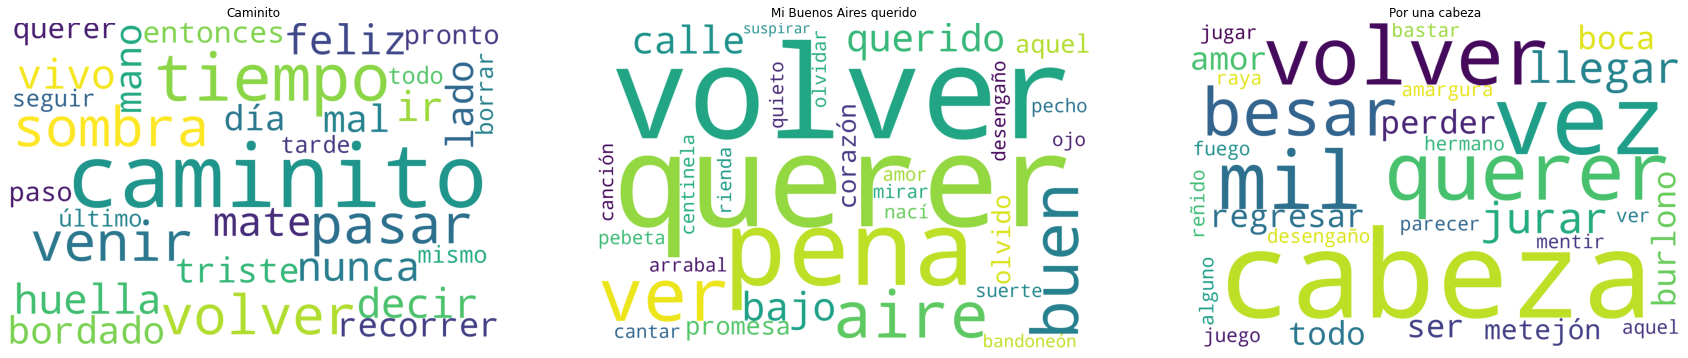

In [ ]:
frequencies = [pd.Series(df_CG.iloc[i,3].split()).value_counts().to_dict() for i in range(len(df_CG.index))]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 36))
atrs = {'height':1200,
        'width':1800,
        'background_color':'white',
        'max_words':30}

wc1 = wordcloud(frequencies[0], atrs)
axs[0].set_title(list(df_CG['name'])[0])
axs[0].imshow(wc1)
axs[0].axis('off')

wc2 = wordcloud(frequencies[1], atrs)
axs[1].set_title(list(df_CG['name'])[1])
axs[1].imshow(wc2)
axs[1].axis('off')

wc3 = wordcloud(frequencies[2], atrs)
axs[2].set_title(list(df_CG['name'])[2])
axs[2].imshow(wc3)
axs[2].axis('off')


## Palabras más usadas por Homero Manzi en sus canciones 

In [ ]:
df_HM = df.loc[df['artist'] == 'Homero Manzi']
homero_manzi = list(df_HM['name'])
# Limpio las palabras raras y stopwords
nlp, sw = inicializar_stanza()
df_HM.lyric = pd.DataFrame(df_HM.lyric.apply(lambda x: clean_text_1(x)))
df_HM.lyric = pd.DataFrame(df_HM.lyric.apply(lambda x: clean_text_2(x)))
df_HM.lyric = pd.DataFrame(df_HM.lyric.apply(lambda x: remove_sw(x, nlp, sw)))

2021-07-04 16:33:06 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |

2021-07-04 16:33:06 INFO: Use device: cpu
2021-07-04 16:33:06 INFO: Loading: tokenize
2021-07-04 16:33:06 INFO: Loading: mwt
2021-07-04 16:33:06 INFO: Loading: pos
2021-07-04 16:33:06 INFO: Loading: lemma
2021-07-04 16:33:07 INFO: Done loading processors!
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Analizando todas las canciones

(-0.5, 1199.5, 799.5, -0.5)

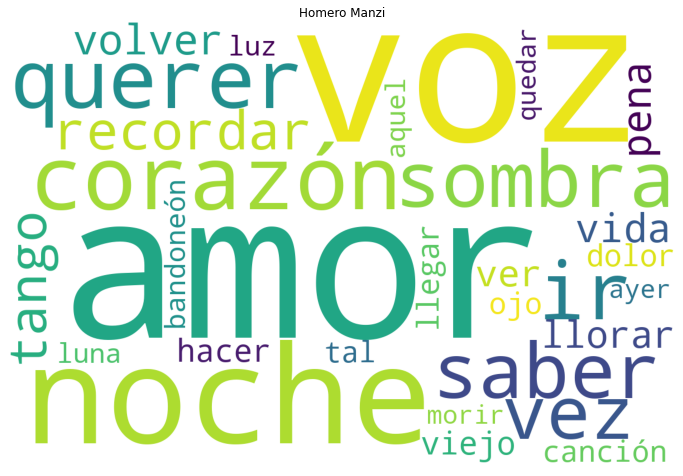

In [ ]:
frequencies = pd.Series(np.concatenate([x.split() for x in df_HM.lyric])).value_counts()

fig, axs = plt.subplots(figsize=(12, 10))
atrs = {'height':800,
        'width':1200,
        'background_color':'white',
        'max_words':30}

wc = wordcloud(frequencies, atrs)
axs.set_title("Homero Manzi")
axs.imshow(wc)
axs.axis('off')

### Analizando cada canción por separado

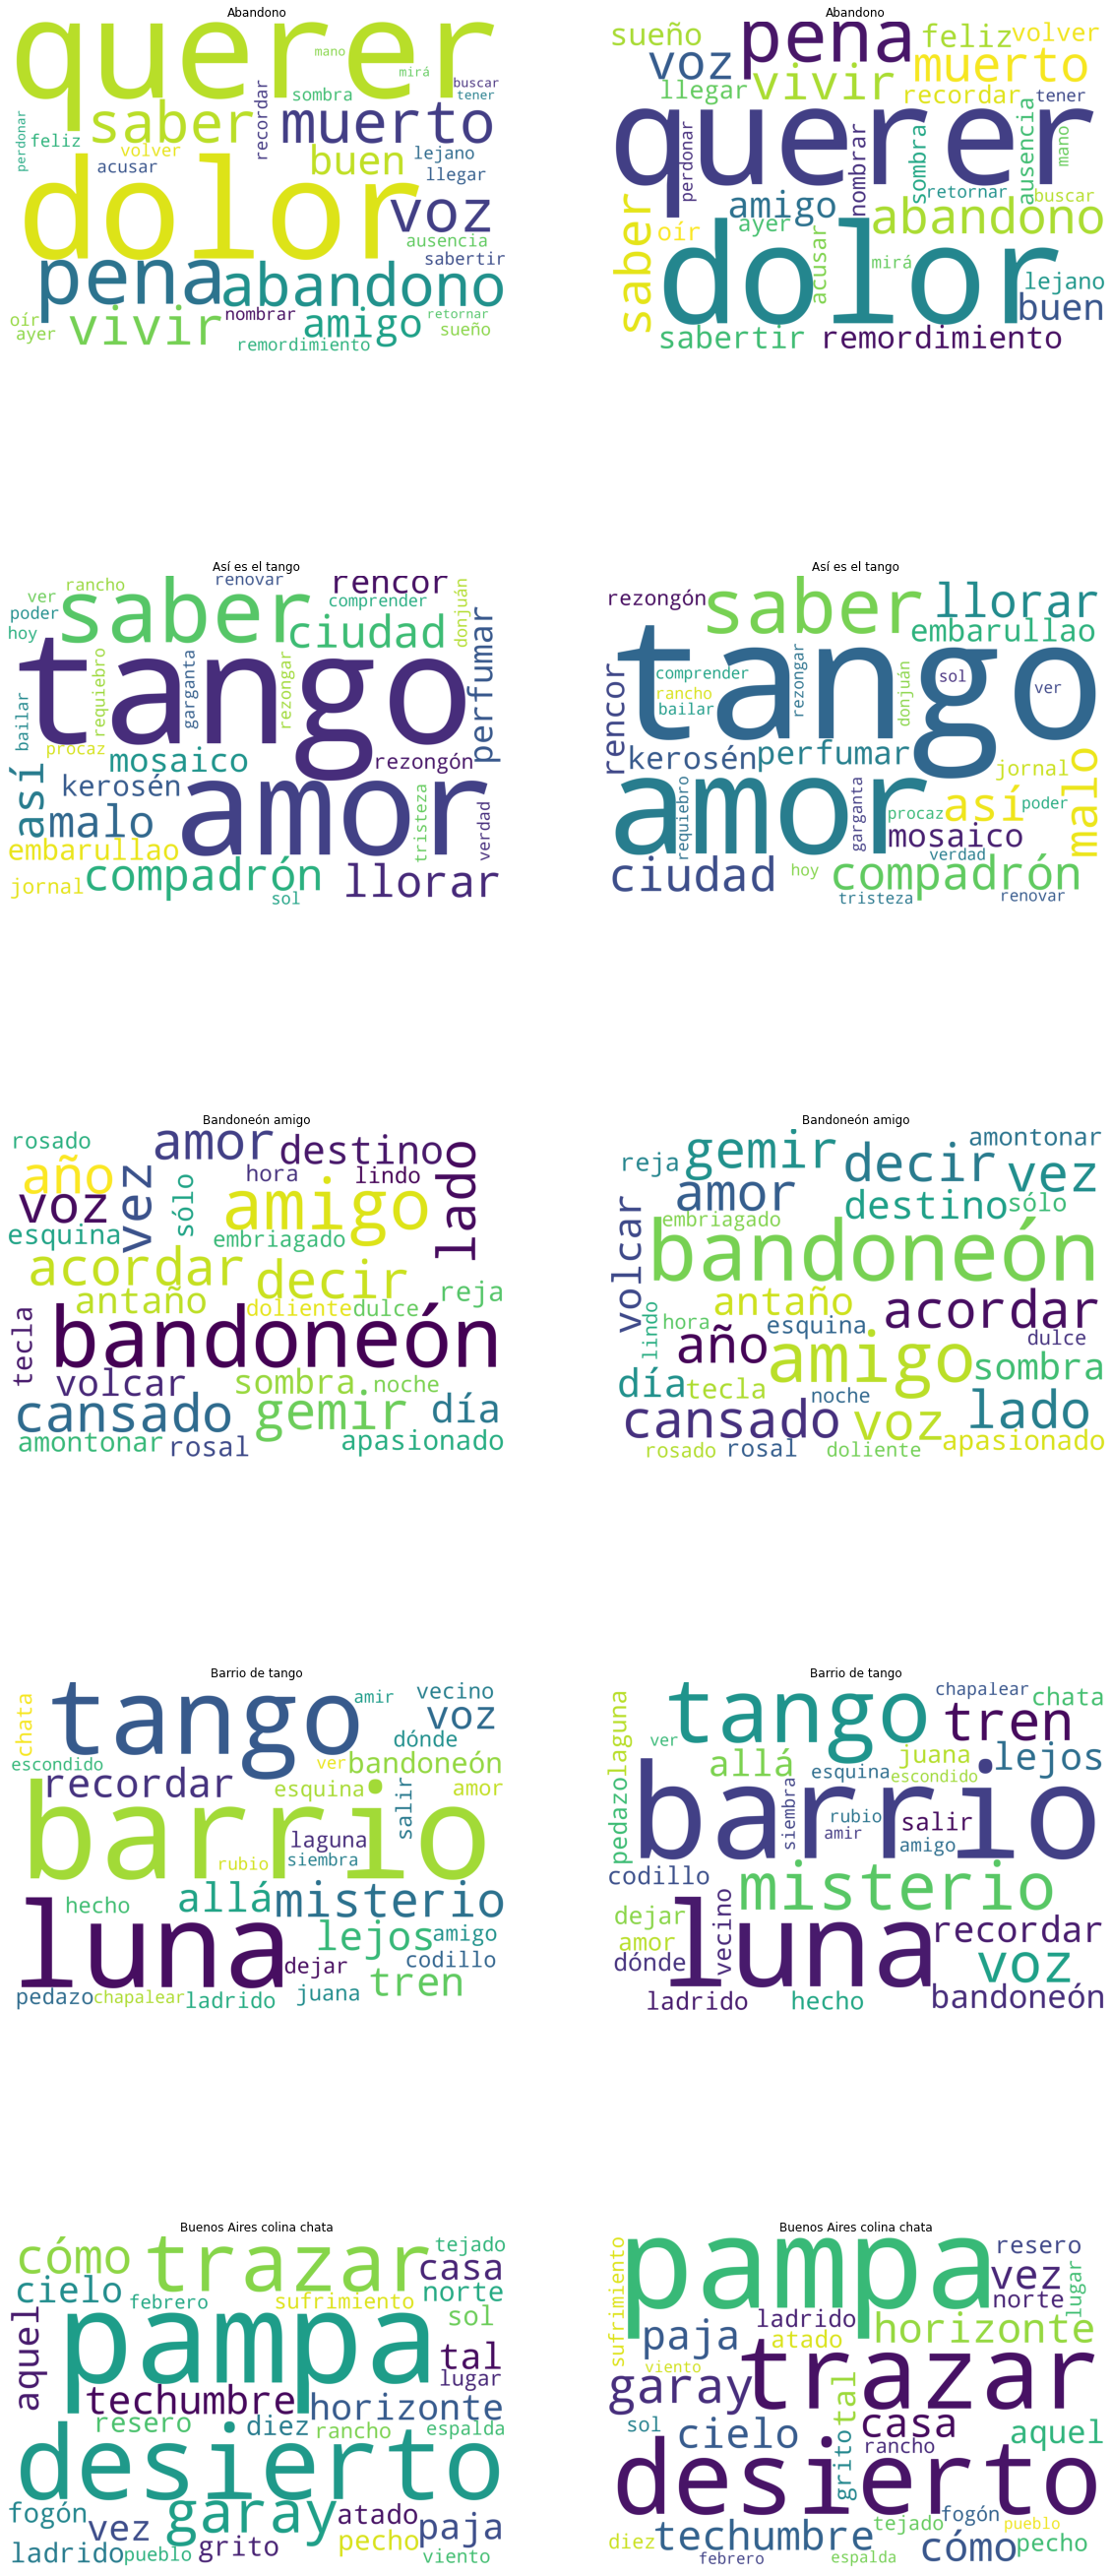

In [ ]:
frequencies = [pd.Series(df_HM.iloc[i,3].split()).value_counts().to_dict() for i in range(len(df_HM.index))]
n= 5
fig, axs = plt.subplots(nrows=n, ncols=2, figsize=(20, n*10))
atrs = {'height':1200,
        'width':1800,
        'background_color':'white',
        'max_words':30}
for i in range(n):
  wc = wordcloud(frequencies[i], atrs)
  axs[i,0].set_title(homero_manzi[i])
  axs[i,0].imshow(wc)
  axs[i,0].axis('off')

for i in range(n):
  wc = wordcloud(frequencies[i], atrs)
  axs[i,1].set_title(homero_manzi[i])
  axs[i,1].imshow(wc)
  axs[i,1].axis('off')

# wc2 = wordcloud(frequencies[1], atrs)
# axs[0,1].set_title(homero_manzi[1])
# axs[0,1].imshow(wc2)
# axs[0,1].axis('off')

# wc3 = wordcloud(frequencies[2], atrs)
# axs[1,0].set_title(homero_manzi[2])
# axs[1,0].imshow(wc3)
# axs[1,0].axis('off')

# wc4 = wordcloud(frequencies[3], atrs)
# axs[1,1].set_title(homero_manzi[3])
# axs[1,1].imshow(wc4)
# axs[1,1].axis('off')

# wc5 = wordcloud(frequencies[4], atrs)
# axs[2,0].set_title(homero_manzi[4])
# axs[2,0].imshow(wc5)
# axs[2,0].axis('off')

# wc6 = wordcloud(frequencies[5], atrs)
# axs[2,1].set_title(homero_manzi[5])
# axs[2,1].imshow(wc6)
# axs[2,1].axis('off')
